## Assignment 2 - Convolutional Neural Networks

In this assignment, you will learn how to implement CNN which you've learnt in the module 2. As a part of this assignment, you will perform image classification using CNNs in PyTorch. The dataset which you'll be using in this assignment will be the standard CIFAR-10 dataset. One important thing you need to know about CIFAR-10 dataset is that the image dimensions in this dataset is 32 $\times$ 32, which is not as same as the MNIST dataset dimension which you might've used while learning FNNs. This notebook contains some pre-written code blocks and some empty cells which you need to fill to build a CNN and perform Image Classification. <br>

### Importing Libraries

In [1]:
# PyTorch Library
import torch
# PyTorch Neural Network
import torch.nn as nn
import torch.nn.functional as F 
# Allows us to transform data
import torchvision.transforms as transforms
# Allows us to download the dataset
import torchvision.datasets as dsets
# Used to graph data and loss curves
import matplotlib.pyplot as plt
# Allows us to use arrays to manipulate and store data
import numpy as np
import random
import seaborn
## Giving us a UI which shall let us see how much data is processed
from tqdm.notebook import tqdm 

In [2]:
def set_seed(seed=42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

set_seed(42)

### Load Dataset


In [3]:
### DO NOT CHANGE THIS CODE

composed = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train = dsets.CIFAR10(root='./data', train=True, download=True, transform=composed)
test = dsets.CIFAR10(root='./data', train=False, download=True, transform=composed)

100%|██████████| 170498071/170498071 [00:12<00:00, 13123729.38it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
from torch.utils.data import random_split, DataLoader

train_ds, val_ds = random_split(train, [45000,5000])
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Training/Testing Split


Load Dataset<br>
Split the dataset into x_train, y_train, x_test, y_test

In [5]:
## :)

### Display Images and Label

Choose 16 images randomly and display them aling with their labels in a 4x4 grid



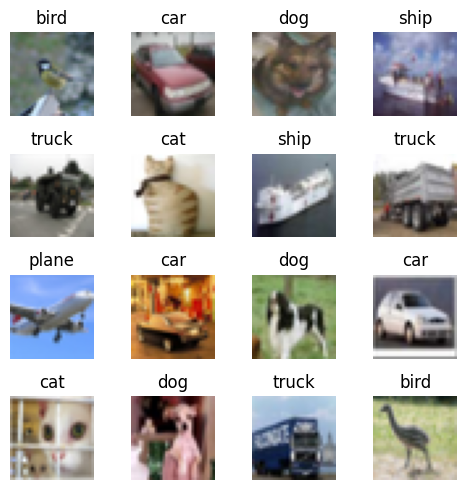

In [6]:
indices = np.random.choice(len(test), 16, replace=False)
images = [test[i][0] for i in indices]
labels = [test[i][1] for i in indices]

fig, axes = plt.subplots(4, 4, figsize=(5, 5))

for i, ax in enumerate(axes.flat):
    image = images[i].numpy().transpose((1, 2, 0))            # Converting tensor to numpy array 
    image = (image*0.5) + 0.5                                 # Denormalizing the image, by mult and adding with 0.5; pixel value [0,1]
    ax.imshow(image)                                             
    ax.axis('off')
    ax.set_title(classes[labels[i]])
plt.tight_layout()
plt.show()

### Modelling

Define a class which will form the architecture of your CNN model


In [7]:
class CNN(nn.Module):
    def __init__(self):
        pass
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)                   # 3 input channels, 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(2, 2)                    # 2x2 max pooling, stride=2
        self.conv2 = nn.Conv2d(6, 16, 5)                  # 6 ip, 16 op, 5x5 krnl
        self.fc1 = nn.Linear(16 * 5 * 5, 120)             # Fully connected layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)                      # 10 output classes
        '''Under this function define the convolutional, pooling,
           fully connected layers. Take special care while calculating 
           the input and output dimensions of a layer using the kernel 
           size, padding and stride'''
        '''This function will defined the overall architecture of your CNN model'''

    def forward(self,x):
        pass
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)                        # To flatten the tensor
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return(x)
        '''In this function, you will put X value through each convolutional,
        pooling, activation function and flatten in to feed to the fully-connected layer'''

### Training


accuracy function, will be used will training

In [8]:
# def get_accuracy(model, train=False):
#     # if train:
#     #     data = train_loader
#     # else:
#     data = val_loader

#     model.eval() # annotate model for evaluation
#     correct = 0
#     total = 0
#     for imgs, labels in tqdm(data):
#         output = model(imgs) 
#         pred = output.max(1, keepdim=True)[1]                         # get the index of the max log-probability
#         correct += pred.eq(labels.view_as(pred)).sum().item()
#         total += imgs.shape[0]
#     return correct / total

Define the Convolutional Neural Network Classifier, Criterion function, Optimizer, and Train the Model

In [9]:
# define criterion function, optimizer, learning rate, number of epochs
# define 2 lists where you will store the cost and accuracy for each epoch

cnn = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn.parameters(), lr=0.01, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cnn.to(device)

def train_model(num_epochs):
    pass

    # defined "3" lists; 1 for loss and 2 for train_acc and val_acc
    losses, train_acc, val_acc = [], [], []
    correct = 0
    total = 0
    val_correct = 0
    val_total = 0
    n=0                                                                   # no. of epoch
    epochs = []                                                            # and epoch array (for plotting)

    for epoch in range(num_epochs):
      print('epoch = ', epoch+1)

    #training 
      train_loss = 0
      for i, data in enumerate(train_loader, 0):
        imgs, labels = data
        imgs, labels = imgs.to(device), labels.to(device)
        cnn.train()
        out = cnn(imgs)

        loss = criterion(out, labels)                             # compute loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += loss

        _, predicted = torch.max(out.data, 1)                     #training accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item() 

      losses.append(float(train_loss)/len(train_loader))                               
      train_acc.append(100*correct/total)    

      epochs.append(n)                
      n += 1

    # with torch.no_grad():
    #validation
      val_loss = 0
      for j, val_data in enumerate(val_loader, 0):
        val_images, val_labels = val_data
        val_images, val_labels = val_images.to(device), val_labels.to(device)

        val_outputs = cnn(val_images)
        val_loss += criterion(val_outputs, val_labels).item()

        _, val_predicted = torch.max(val_outputs.data, 1)        #validation accuracy
        val_total += val_labels.size(0)
        val_correct += (val_predicted == val_labels).sum().item()
      val_acc.append(100 * val_correct / val_total)

    return losses, train_acc, val_acc, epochs 
    '''In this function, you will make prediction for each X value, calculate the loss,
    calculate the gradient value with respect to each weight and bias, accumulate the total loss
    and update the cost and accuracy list'''


## Actually training your model
- Create a model, initialize it. Define optimizer for the model as well as loss criterion (you can actually set the seed here again, just in case you did some ```rand``` calls above for testing your functions).
- Define an instance of the dataset class, wrap it in a dataloader.
- Call the train function and train your model!


In [10]:
## first 2 points already done above

losses, train_acc, val_acc, epochs = train_model(50)

epoch =  1
epoch =  2
epoch =  3
epoch =  4
epoch =  5
epoch =  6
epoch =  7
epoch =  8
epoch =  9
epoch =  10
epoch =  11
epoch =  12
epoch =  13
epoch =  14
epoch =  15
epoch =  16
epoch =  17
epoch =  18
epoch =  19
epoch =  20
epoch =  21
epoch =  22
epoch =  23
epoch =  24
epoch =  25
epoch =  26
epoch =  27
epoch =  28
epoch =  29
epoch =  30
epoch =  31
epoch =  32
epoch =  33
epoch =  34
epoch =  35
epoch =  36
epoch =  37
epoch =  38
epoch =  39
epoch =  40
epoch =  41
epoch =  42
epoch =  43
epoch =  44
epoch =  45
epoch =  46
epoch =  47
epoch =  48
epoch =  49
epoch =  50


### Analyze Results

Training and Validation Accuracy

In [11]:
print("Final Training Accuracy: {}".format(train_acc[-1]))
print("Final Validation Accuracy: {}".format(val_acc[-1]))

Final Training Accuracy: 76.92435555555555
Final Validation Accuracy: 58.9272


Plot the Loss and Accuracy vs Epoch graph

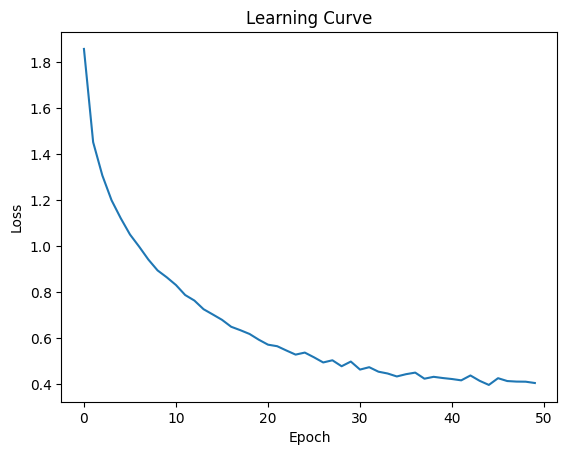

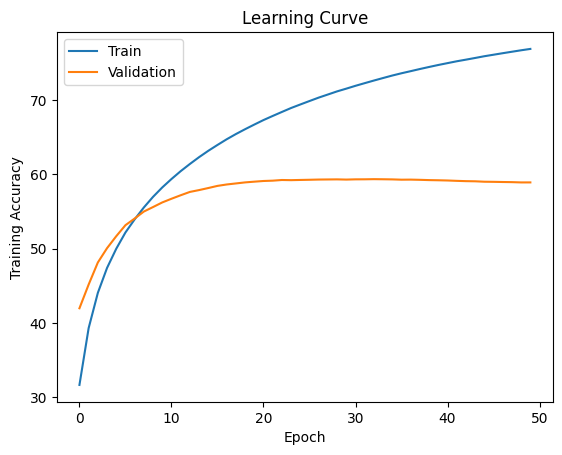

In [12]:
plt.title("Learning Curve")
plt.plot(epochs, losses, label="Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.title("Learning Curve")
plt.plot(epochs, train_acc, label="Train")
plt.plot(epochs, val_acc, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.legend(loc='best')
plt.show()

### Submission

Create another folder named **Week 2** in your Github Repo.<br>
Save the trained model in a file named ```final_model.pt```. When you are done with the assignment, commit the updated notebook, and the ```final_model.pt``` model-weights file to Github Repo.

In [31]:
## Save the model
torch.save(cnn.state_dict(), 'final_model.pt')

### Load the model

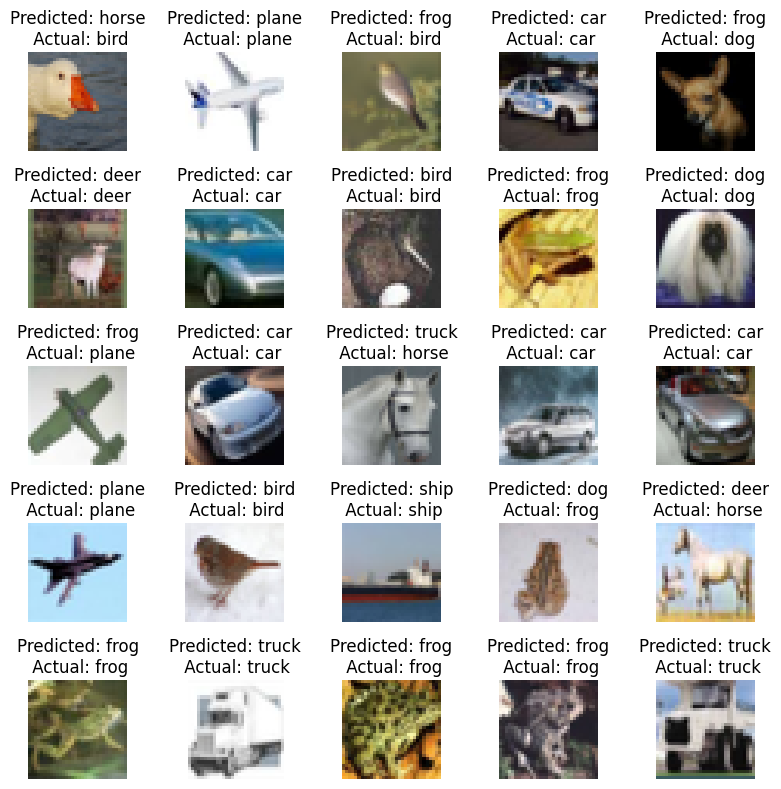

In [33]:
## Load the saved model and Make prediction on few images and display them the same way as before

cnn.load_state_dict(torch.load('final_model.pt')) 

indices = np.random.choice(len(test), 25, replace=False)
images = [test[i][0] for i in indices]
labels = [test[i][1] for i in indices]
# images, labels = images.cuda(), labels.cuda()

inputs = torch.stack(images).to(device)

outputs = cnn(inputs)
_, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(5, 5, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    image = images[i].numpy().transpose((1, 2, 0))
    image = image / 2 + 0.5
    ax.imshow(image)
    ax.set_title(f'Predicted: {classes[predicted[i]]}\n Actual: {classes[labels[i]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()
